# ***Dataset Preprocessing***

This notebook shows the preprocessing of the dataset.

### ***Import packages***

Before we begin, let's import all the necessary packages for this notebook.
First we add the directory which has our python files:

In [1]:
import sys
sys.path.insert(0, "../..")

Next we import all the necessary packages for this notebook:

In [2]:
import pandas as pd
from os.path import join
from pathlib import Path
from matplotlib import pyplot as plt
from pyimzml.ImzMLParser import ImzMLParser
from pyimzml.ImzMLWriter import ImzMLWriter
from tqdm.notebook import tqdm
from nnbiopsy.spectra_utils.normalization import TICNormalizer
from nnbiopsy.spectra_utils.binning import EqualWidthBinning

### ***Constants definitions***

Next, let's define some constant variables for this notebook:

In [3]:
# Define folder that contains the dhg dataset
DHG_PATH = "./../../../DHG/"
# Define folder that contains the original dataset
DATA_IN_PATH = f"{DHG_PATH}/raw"
# Define folder to save preprocessed dataset
DATA_OUT_PATH = f"{DHG_PATH}/preprocessed"
# Define path to save plots
PLOTS_OUT_PATH = "preprocess"
# Define file that contains dhg metadata
METADATA_PATH = f"{DHG_PATH}/metadata.csv"
# Define mass range start value
MZ_START = 50
# Define mass range end value
MZ_END = 1200
# Define mass resolution of the data
MASS_RESOLUTION = 0.025

### ***Creating output folder***

Next, let's create the output folder:

In [4]:
# Create output folder if doesn't exist
Path(DATA_OUT_PATH).mkdir(parents=True, exist_ok=True)
Path(PLOTS_OUT_PATH).mkdir(parents=True, exist_ok=True)

### ***Reading MSI metadata***

Next, lets read the metadata file:

In [5]:
# read metadata csv
metadata_df = pd.read_csv(METADATA_PATH)

### ***Creating spectra preprocess pipeline***

Next, lets create the preprocess pipeline for each spectra in the image:

In [6]:
# Get normalizer object
normalizer = TICNormalizer()
# Get binning object
binning = EqualWidthBinning(MZ_START, MZ_END, MASS_RESOLUTION / 2)
# Create preprocess pipe
pre_process_pipe = (lambda mzs, intensities: (binning.bin(
    normalizer.normalize((mzs, intensities)))))

### ***Preprocess each MSI***

Next, let's preprocess each MSI spectra. For each sample (ROI) we extract the sample from the MSI, and for each ROI we preprocess all spectra's using spectra preprocess pipeline:

In [7]:
# loop over each ROI in dataframe
for index, roi in tqdm(metadata_df.iterrows(),
                       total=metadata_df.shape[0],
                       desc="ROIs Loop"):
  # Parse the MSI file containing ROI
  with ImzMLParser(join(DATA_IN_PATH, f"{roi.file_name}.imzML")) as reader:
    # Create a new MSI for ROI. because we apply binning
    # we can use mode="continuous"
    with ImzMLWriter(join(DATA_OUT_PATH,
                          f"{roi.sample_file_name}.imzML"),
                     mode="continuous") as writer:
      # Loop over each spectra in MSI
      for idx, (x, y, z) in tqdm(enumerate(reader.coordinates),
                                 total=len(reader.coordinates),
                                 desc="Spectra Loop"):
        # Check if spectra is in ROI boundaries
        if ((roi.x_min <= x) & (roi.x_max >= x) & (roi.y_min <= y) &
            (roi.y_max >= y)):
          # Read spectra from MSI
          raw_mzs, raw_intensities = reader.getspectrum(idx)
          # Apply preprocessing pipe
          preprocessed_mzs, preprocessed_intensities = pre_process_pipe(
              raw_mzs, raw_intensities)
          # Write spectra to ROI MSI but by ROIs coordinates
          writer.addSpectrum(preprocessed_mzs, preprocessed_intensities,
                             (x - roi.x_min + 1, y - roi.y_min + 1, z))

ROIs Loop:   0%|          | 0/48 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/14022 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/14022 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/14022 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/7482 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/7482 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/14196 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/14196 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/7938 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/7938 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/12920 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/12920 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/10220 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/10220 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/24024 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/24024 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/24024 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/6095 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/6095 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/27876 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/27876 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/27876 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/27876 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/27876 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/23718 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/23718 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/23718 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/23718 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/23718 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/10570 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/10570 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/10570 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/5265 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/5265 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/26207 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/26207 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/26207 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/26207 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/26207 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/26207 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/28584 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/28584 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/28584 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/28584 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/28584 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/15045 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/15045 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/6000 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/6000 [00:00<?, ?it/s]

### ***Visualizing preprocess on single spectra***

Next, lets visualize the preprocess pipeline for a single spectra:

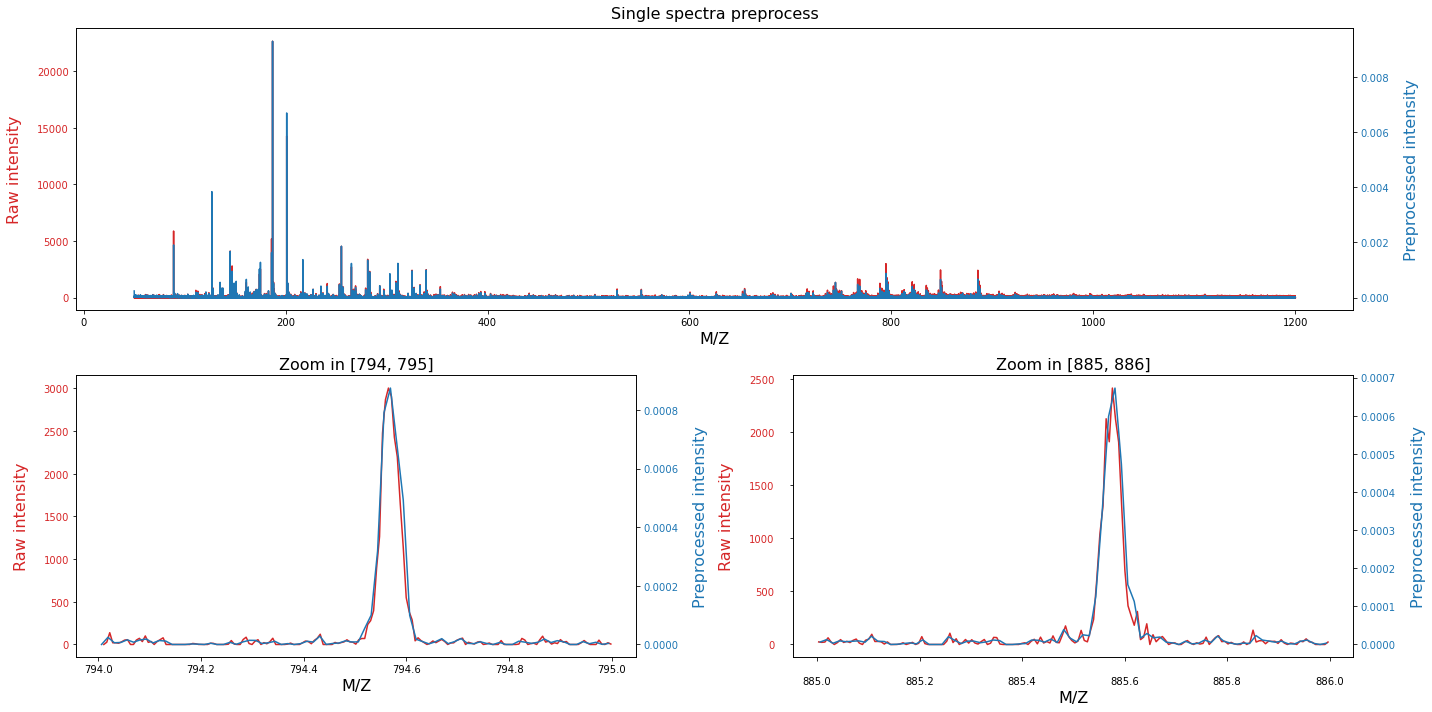

In [8]:
plt.rcParams.update({'font.size': 12})

with ImzMLParser(
    join(DATA_IN_PATH, f"{metadata_df.file_name[3]}.imzML")
) as reader:
  # Get single spectra
  raw_mzs, raw_intensities = reader.getspectrum(2999)

  # Preprocess spectrum
  preprocessed_mzs, preprocessed_intensities = pre_process_pipe(
      raw_mzs, raw_intensities
  )

  # Create plot
  fig = plt.figure(figsize=(20, 10))

  # Define colors for lines
  color_raw = "tab:red"
  color_preprocessed = "tab:blue"

  # Get zoom in area for top left plot
  lower_1 = 794
  upper_1 = 795
  idx_1_1 = (raw_mzs >= lower_1) & (raw_mzs <= upper_1)
  idx_1_2 = (preprocessed_mzs >= lower_1) & (preprocessed_mzs <= upper_1)

  # Get zoom in area for top right plot
  lower_2 = 885
  upper_2 = 886
  idx_2_1 = (raw_mzs >= lower_2) & (raw_mzs <= upper_2)
  idx_2_2 = (preprocessed_mzs >= lower_2) & (preprocessed_mzs <= upper_2)

  # Top Plot
  sub1_1 = fig.add_subplot(2, 2, (1, 2))
  sub1_1.plot(raw_mzs, raw_intensities, color=color_raw)
  sub1_1.tick_params(axis="y", labelcolor=color_raw)
  sub1_1.set_xlabel("M/Z", fontsize=16)
  sub1_1.set_ylabel("Raw intensity", color=color_raw, labelpad=15, fontsize=16)

  sub1_2 = sub1_1.twinx()
  sub1_2.plot(
      preprocessed_mzs, preprocessed_intensities, color=color_preprocessed
  )
  sub1_2.tick_params(axis="y", labelcolor=color_preprocessed)
  sub1_2.set_ylabel(
      "Preprocessed intensity", color=color_preprocessed, labelpad=15,
      fontsize=16
  )

  # Bottom left plot
  sub2_1 = fig.add_subplot(2, 2, 3)
  sub2_1.plot(raw_mzs[idx_1_1], raw_intensities[idx_1_1], color=color_raw)
  sub2_1.tick_params(axis="y", labelcolor=color_raw)
  sub2_1.set_xlabel("M/Z", fontsize=16)
  sub2_1.set_ylabel("Raw intensity", color=color_raw, labelpad=15, fontsize=16)

  sub2_2 = sub2_1.twinx()
  sub2_2.plot(
      preprocessed_mzs[idx_1_2], preprocessed_intensities[idx_1_2],
      color=color_preprocessed
  )
  sub2_2.tick_params(axis="y", labelcolor=color_preprocessed)
  sub2_2.set_ylabel(
      "Preprocessed intensity", color=color_preprocessed, labelpad=15,
      fontsize=16
  )

  # Bottom right plot
  sub3_1 = fig.add_subplot(2, 2, 4)
  sub3_1.plot(raw_mzs[idx_2_1], raw_intensities[idx_2_1], color=color_raw)
  sub3_1.tick_params(axis="y", labelcolor=color_raw)
  sub3_1.set_xlabel("M/Z", fontsize=16)
  sub3_1.set_ylabel("Raw intensity", color=color_raw, labelpad=15, fontsize=16)

  sub3_2 = sub3_1.twinx()
  sub3_2.plot(
      preprocessed_mzs[idx_2_2], preprocessed_intensities[idx_2_2],
      color=color_preprocessed
  )
  sub3_2.tick_params(axis="y", labelcolor=color_preprocessed)
  sub3_2.set_ylabel(
      "Preprocessed intensity", color=color_preprocessed, labelpad=15,
      fontsize=16
  )

  # Plots titles
  sub1_1.set_title("Single spectra preprocess", pad=10, fontsize=16)
  sub2_1.set_title(f"Zoom in [{lower_1}, {upper_1}]", fontsize=16)
  sub3_1.set_title(f"Zoom in [{lower_2}, {upper_2}]", fontsize=16)
  sub3_1.tick_params(pad=15)

  # Show plot
  plt.tight_layout()
  plt.savefig(
      f"{PLOTS_OUT_PATH}/single_spectra_preprocess.png", transparent=True
  )
  plt.show()

  # Save data for plot creation
  pd.Series(raw_intensities, index=raw_mzs
           ).to_csv(f"{PLOTS_OUT_PATH}/raw_spectra.csv", header=False)
  pd.Series(preprocessed_intensities, index=preprocessed_mzs
           ).to_csv(f"{PLOTS_OUT_PATH}/preprocessed_spectra.csv", header=False)